In [1]:
#import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 18,8
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import seaborn as sns

In [2]:
dateparser = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
dataset = pd.read_csv('C:/Faculta anul 3 sem 2/Licenta/DJIA/HON.csv', sep=',', index_col = 'Date', parse_dates = ['Date'], date_parser = dateparser).fillna(0)
dataset.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,147.601196,146.364792,147.428665,147.323242,2987743.0,137.641174
2018-01-03,147.217819,145.492599,146.546906,146.106018,6612348.0,136.503937
2018-01-04,148.080414,146.364792,146.460632,148.080414,4691432.0,138.348602
2018-01-05,149.757706,148.089996,148.540466,149.115540,2586470.0,139.315704
2018-01-08,149.652267,147.821640,149.518097,148.310440,2858680.0,138.563477


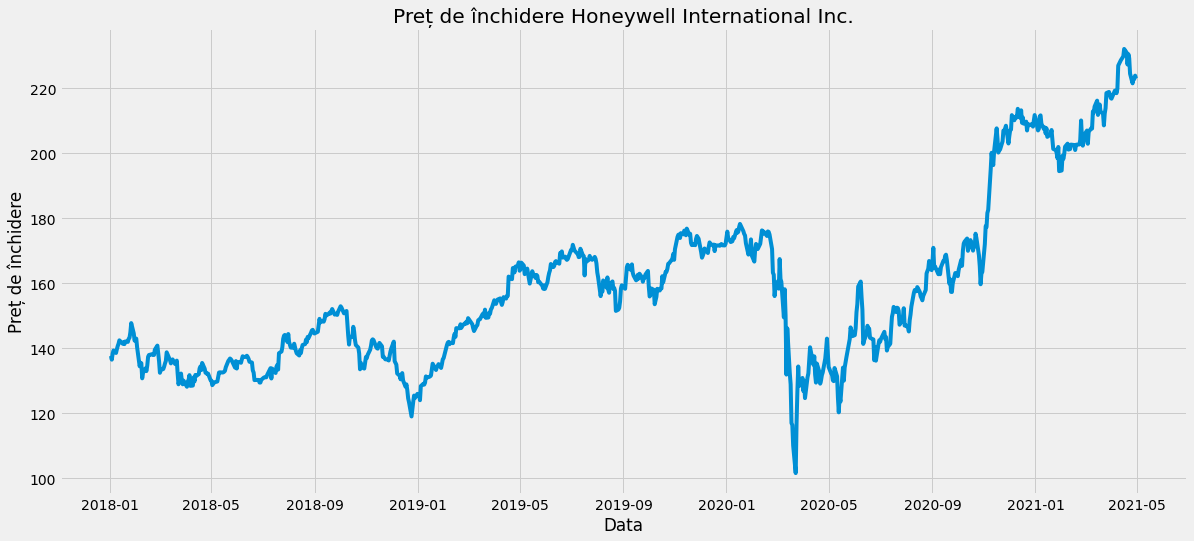

In [3]:
plt.xlabel('Data')
plt.ylabel('Preț de închidere')
plt.plot(dataset['Adj Close'])
plt.title('Preț de închidere Honeywell International Inc.')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

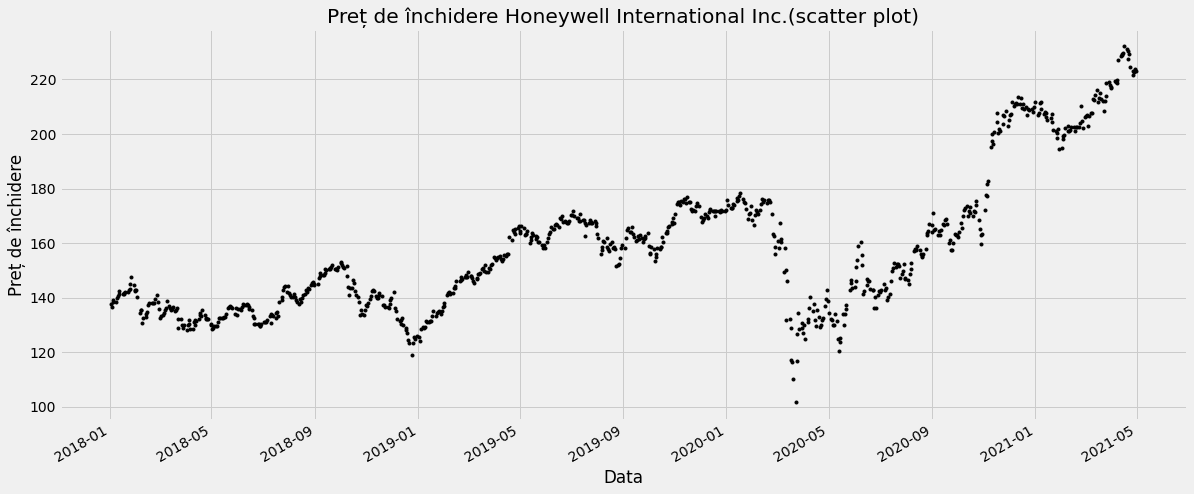

In [4]:
df_close = dataset['Adj Close']
df_close.plot(style='k.')
plt.xlabel('Data')
plt.ylabel('Preț de închidere')
plt.title('Preț de închidere Honeywell International Inc.(scatter plot)')
plt.show

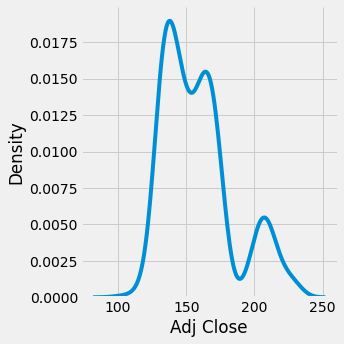

In [5]:
density = sns.displot(dataset, x="Adj Close", kind="kde")

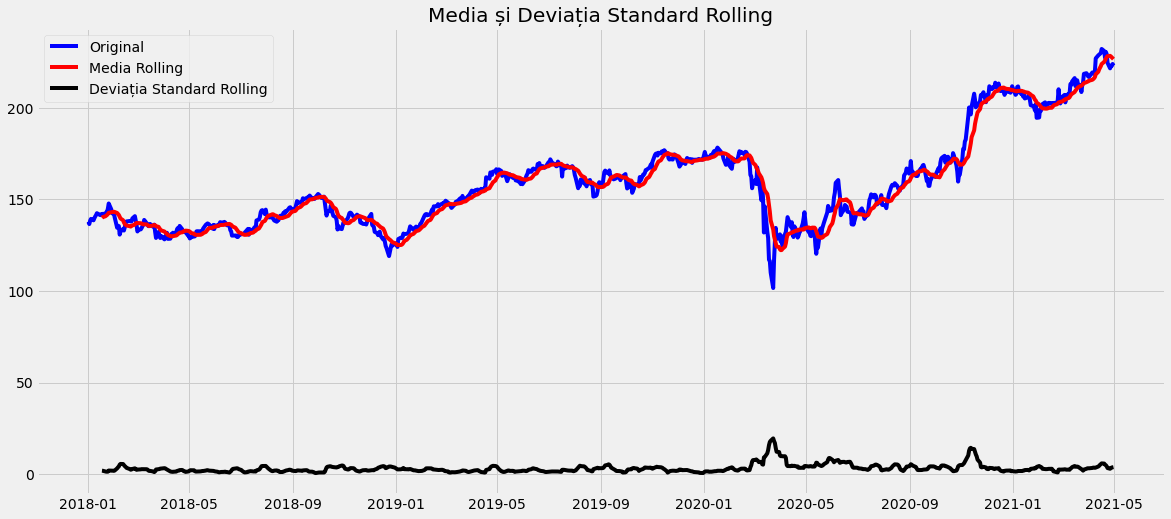

Rezultatele testului Dickey-Fuller Augmentat: 
Test statistic            -0.434297
p-value                    0.904213
Nr. decalaje folosite      8.000000
Nr. observatii           829.000000
valoare critica (1%)      -3.438263
valoare critica (5%)      -2.865033
valoare critica (10%)     -2.568630
dtype: float64


In [6]:
def test_stationarity(timeseries):
    rolling_mean = timeseries.rolling(12).mean()
    rolling_std = timeseries.rolling(12).std()
    plt.plot(timeseries, color = 'blue', label = 'Original')
    plt.plot(rolling_mean, color = 'red', label='Media Rolling')
    plt.plot(rolling_std, color = 'black', label = 'Deviația Standard Rolling')
    plt.legend(loc='best')
    plt.title('Media și Deviația Standard Rolling')
    plt.show(block=False)
    
    print('Rezultatele testului Dickey-Fuller Augmentat: ')
    adft = adfuller(timeseries, autolag = 'AIC')
    results = pd.Series(adft[0:4],index=['Test statistic','p-value','Nr. decalaje folosite','Nr. observatii'])
    for key, value in adft[4].items():
        results['valoare critica (%s)' %key] = value
    print(results)
test_stationarity(df_close)

<Figure size 1296x576 with 0 Axes>

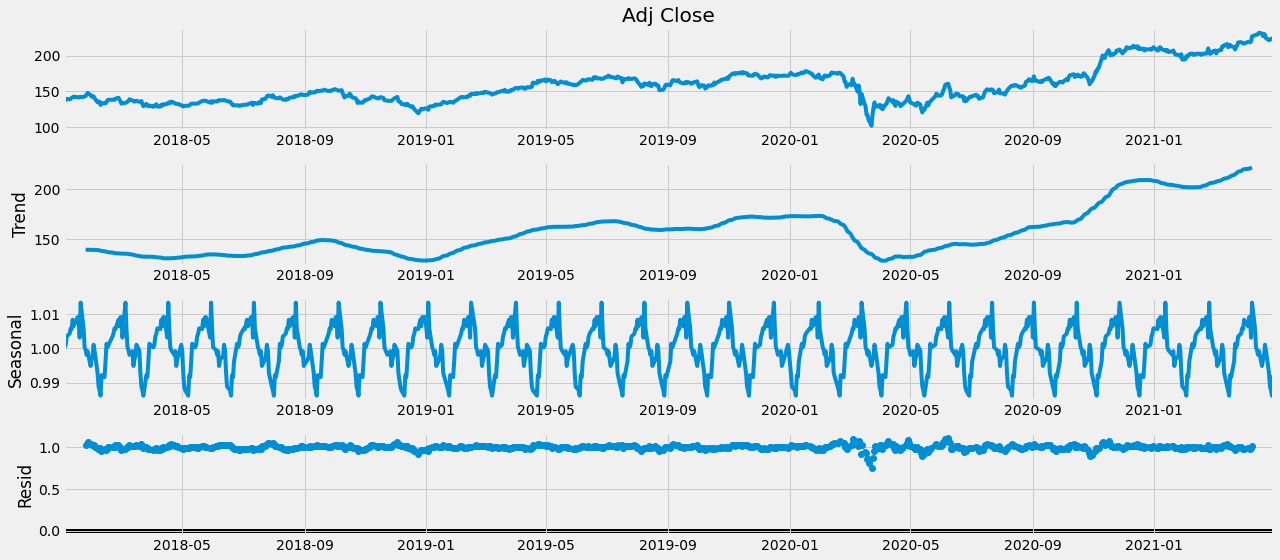

In [7]:
result = seasonal_decompose(df_close, model='multiplicative',freq = 30)
fig = plt.figure()
fig = result.plot()

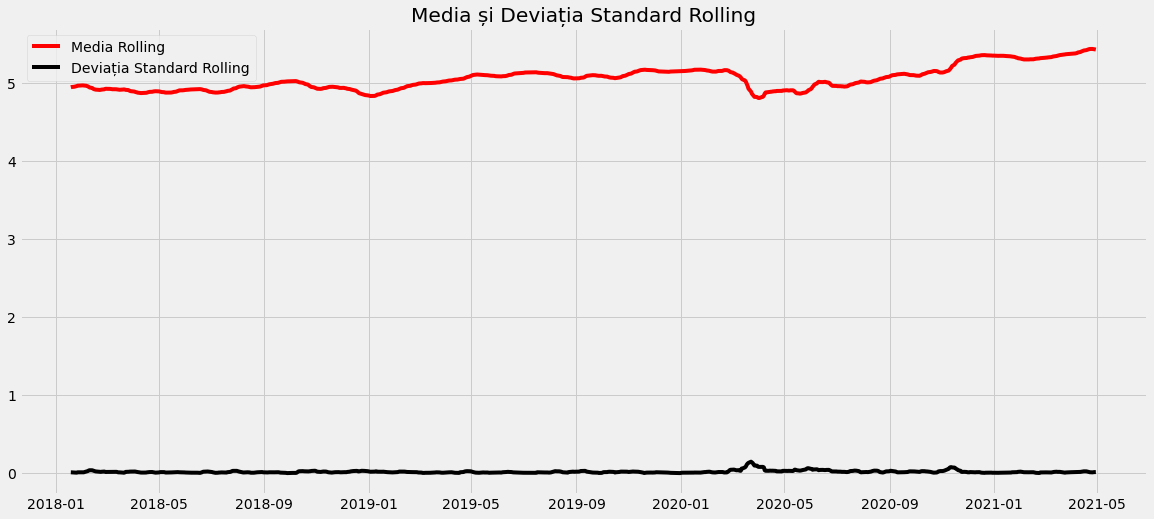

In [8]:
df_log = np.log(df_close)
rolling_mean = df_log.rolling(12).mean()
rolling_std = df_log.rolling(12).std()
plt.title('Media și Deviația Standard Rolling')
plt.plot(rolling_mean, color = 'red', label='Media Rolling')
plt.plot(rolling_std, color = 'black', label = 'Deviația Standard Rolling')
plt.legend(loc='best')
plt.show()

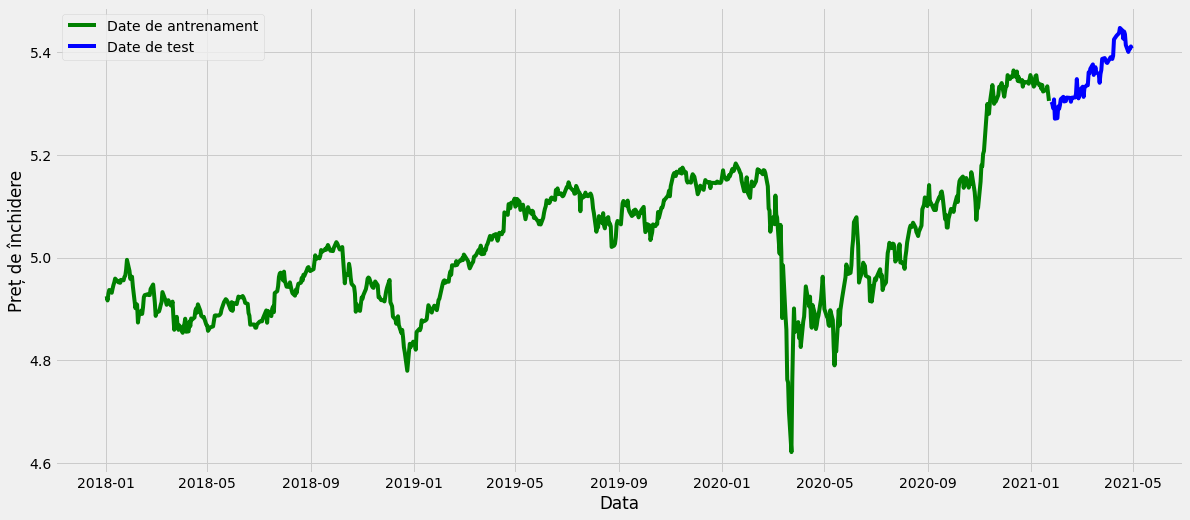

In [9]:
train_data, test_data = df_log[:int(len(df_log)*0.92)], df_log[int(len(df_log)*0.92):]
plt.xlabel('Data')
plt.ylabel('Preț de închidere')
plt.plot(train_data, 'green', label = "Date de antrenament")
plt.plot(test_data, 'blue', label = "Date de test")
plt.legend()

In [10]:
train_data

Date
2018-01-02    4.924650
2018-01-03    4.916353
2018-01-04    4.929777
2018-01-05    4.936743
2018-01-08    4.931329
                ...   
2021-01-15    5.323314
2021-01-19    5.327142
2021-01-20    5.333506
2021-01-21    5.319715
2021-01-22    5.305088
Name: Adj Close, Length: 770, dtype: float64

In [11]:
test_data

Date
2021-01-25    5.303207
2021-01-26    5.299187
2021-01-27    5.290796
2021-01-28    5.308001
2021-01-29    5.270479
                ...   
2021-04-26    5.400513
2021-04-27    5.406858
2021-04-28    5.406589
2021-04-29    5.411199
2021-04-30    5.407351
Name: Adj Close, Length: 68, dtype: float64

In [12]:
auto_ARIMA = auto_arima(train_data,
                        start_p=0, start_q=0,
                        test = 'adf',
                        max_p=3, max_q=3,
                        m=1,
                        d=None,
                        seasonal=True,
                        start_P=0, 
                        D=0,
                        trace=True,
                        error_action = 'ignore',
                        suppress_warnings=True,
                        stepwise=True,)
print(auto_ARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-3919.763, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-3921.116, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-3920.596, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-3921.234, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-3920.911, Time=0.24 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.627 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  770
Model:               SARIMAX(0, 1, 0)   Log Likelihood                1961.617
Date:                Sun, 20 Jun 2021   AIC                          -3921.234
Time:                        15:33:06   BIC                          -3916.589
Sample:                             0   HQIC                         -3919.446
                                - 770                                  

In [14]:
first_diff = train_data - train_data.shift(1)
first_diff = first_diff.dropna(inplace = False)

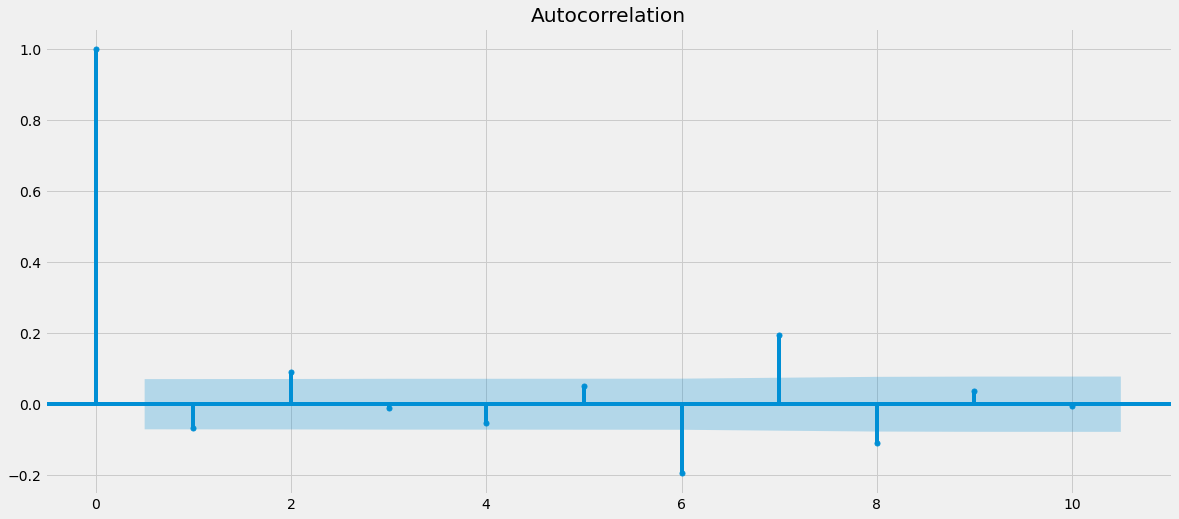

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf_plot = plot_acf(first_diff,lags = 10)

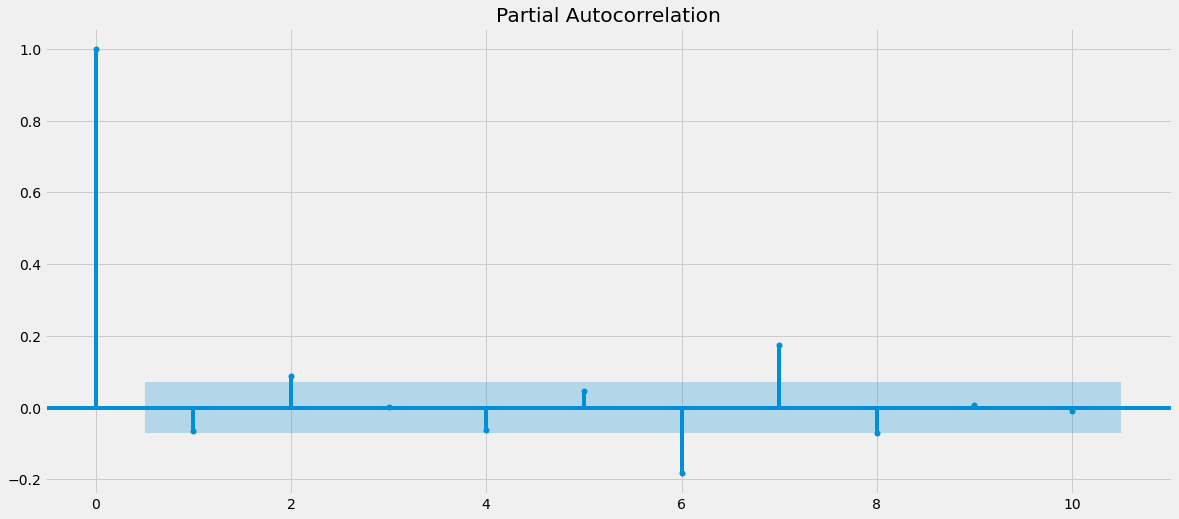

In [16]:
pacf_plot = plot_pacf(first_diff, lags=10)

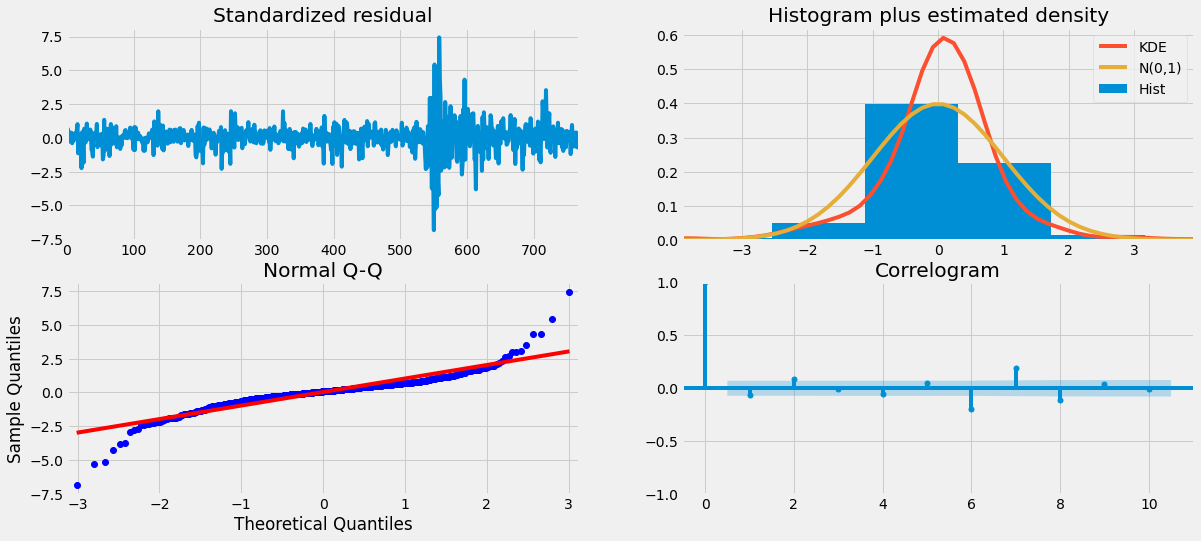

In [13]:
auto_ARIMA.plot_diagnostics()
plt.show()

In [17]:
warnings.filterwarnings('ignore')
model = ARIMA(train_data, order=(2, 1, 2))  
fitted = model.fit(disp=-1,trend=  'nc')  
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Adj Close   No. Observations:                  769
Model:                 ARIMA(2, 1, 2)   Log Likelihood                1983.501
Method:                       css-mle   S.D. of innovations              0.018
Date:                Sun, 20 Jun 2021   AIC                          -3957.002
Time:                        15:33:07   BIC                          -3933.777
Sample:                             1   HQIC                         -3948.063
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
ar.L1.D.Adj Close    -1.7080      0.045    -38.109      0.000      -1.796      -1.620
ar.L2.D.Adj Close    -0.8608      0.045    -19.050      0.000      -0.949      -0.772
ma.L1.D.Adj Close     1.

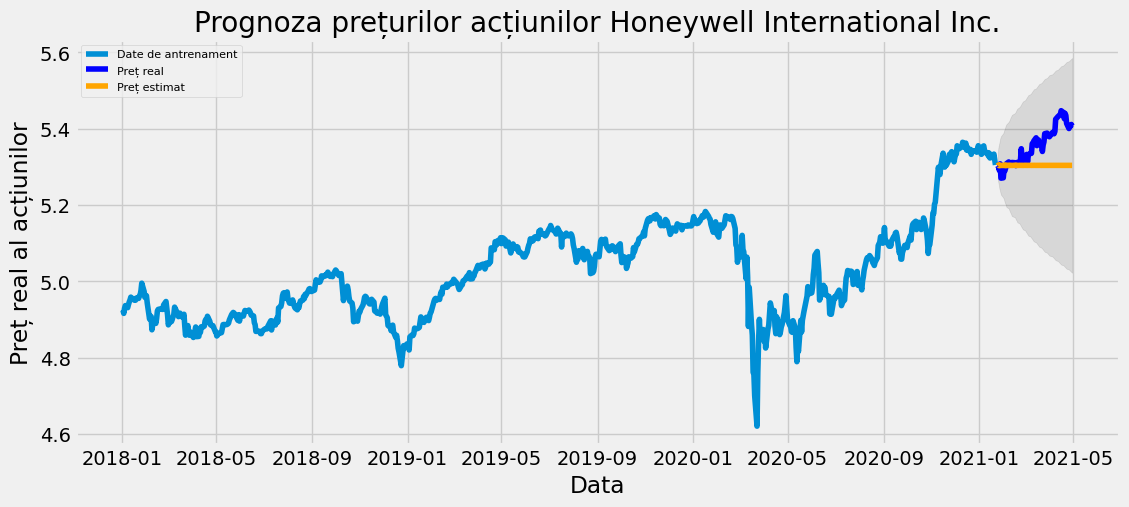

In [18]:
fc, se, conf = fitted.forecast(68, alpha=0.05)
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='Date de antrenament')
plt.plot(test_data, color = 'blue', label='Preț real')
plt.plot(fc_series, color = 'orange',label='Preț estimat')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.title('Prognoza prețurilor acțiunilor Honeywell International Inc.')
plt.xlabel('Data')
plt.ylabel('Preț real al acțiunilor')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [20]:
mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: '+str(mse))
mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))*100
print('MAPE: '+str(mape))

MSE: 231.90746598334388
MAE: 11.764339396851858
RMSE: 15.228508330868912
MAPE: 5.3416574166641455
